In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


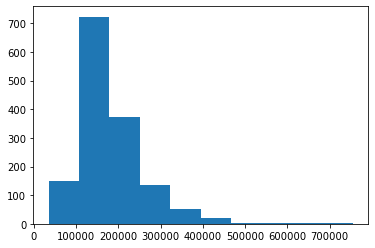

In [3]:
plt.hist(data.SalePrice)
plt.show()

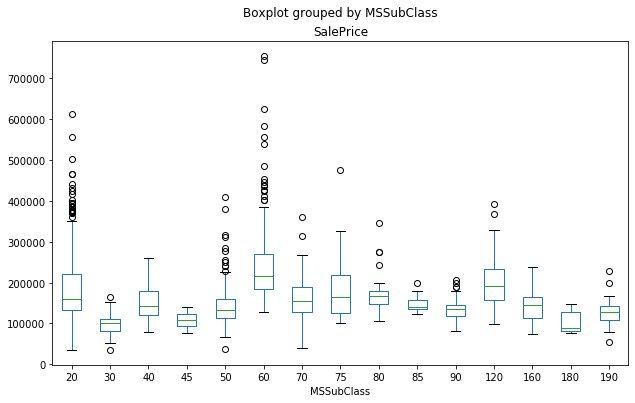

In [4]:
data.boxplot(column='SalePrice',by='MSSubClass',grid=False,figsize=(10,6))
plt.show()

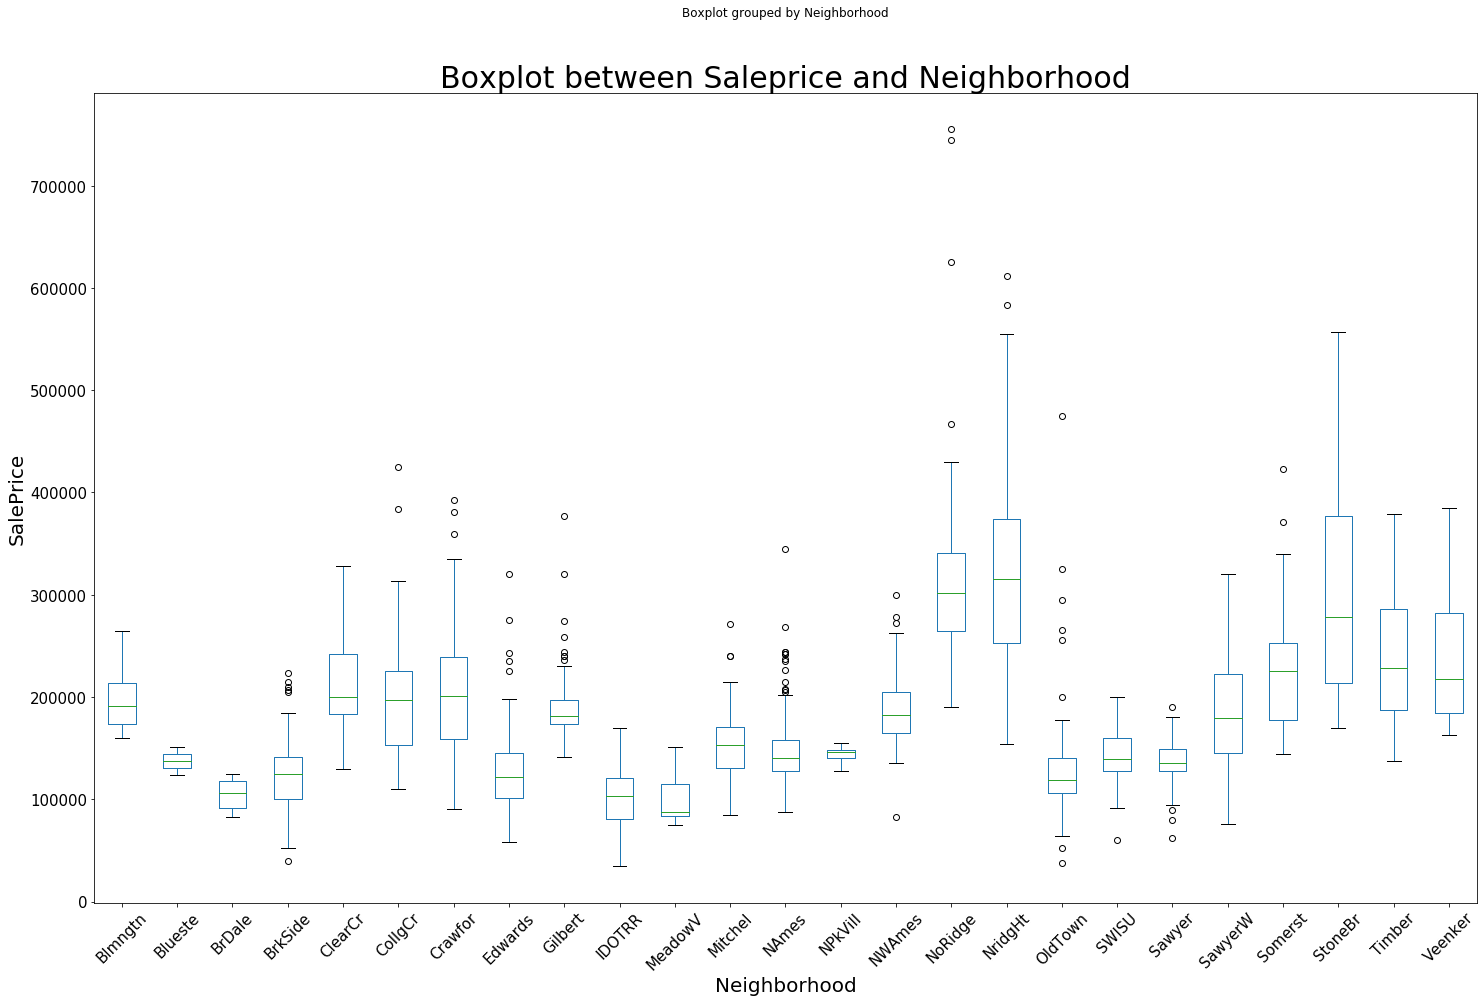

In [5]:
data.boxplot(column='SalePrice',by='Neighborhood',grid=False,figsize=(24,15))
plt.title('Boxplot between Saleprice and Neighborhood',fontsize=30)
plt.xlabel('Neighborhood',fontsize=20)
plt.ylabel('SalePrice',fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.show()

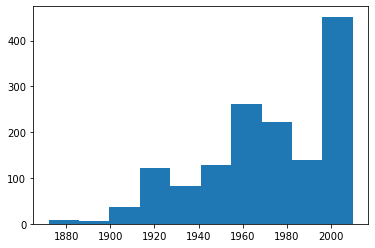

In [6]:
plt.hist(data.YearBuilt)
plt.show()

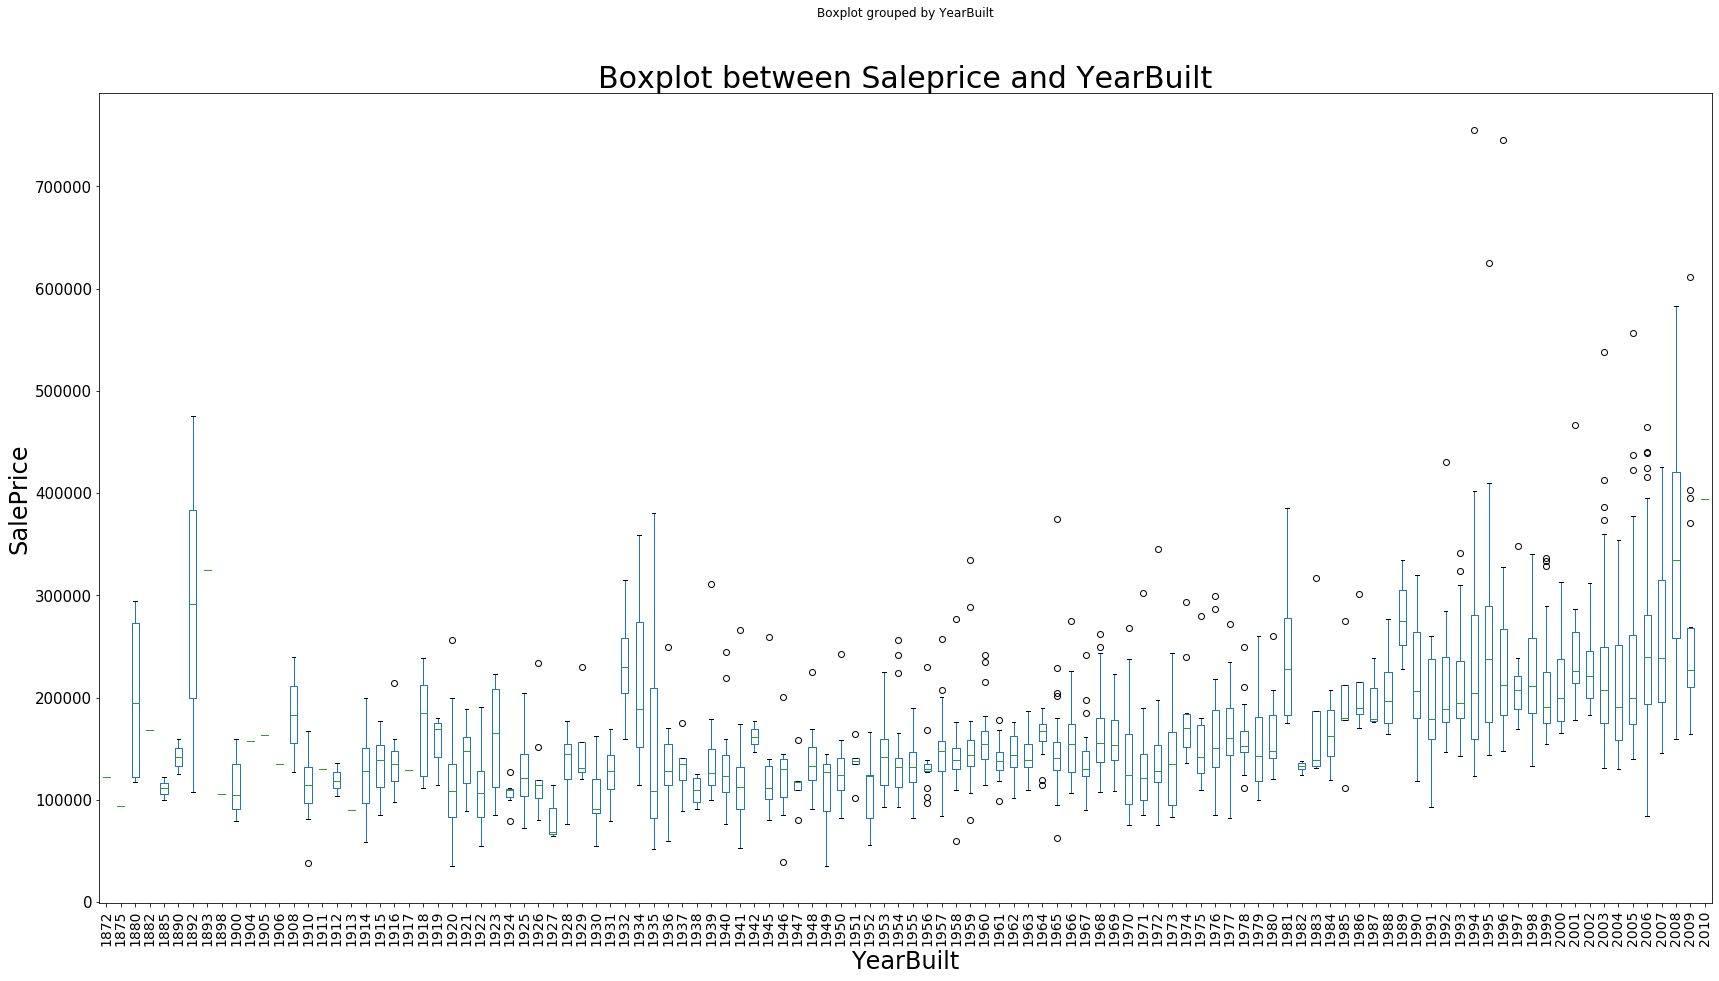

In [7]:
data.boxplot(column='SalePrice',by='YearBuilt',grid=False,figsize=(28,15))
plt.title('Boxplot between Saleprice and YearBuilt',fontsize=30)
plt.xlabel('YearBuilt',fontsize=24)
plt.ylabel('SalePrice',fontsize=24)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=15)
plt.show()

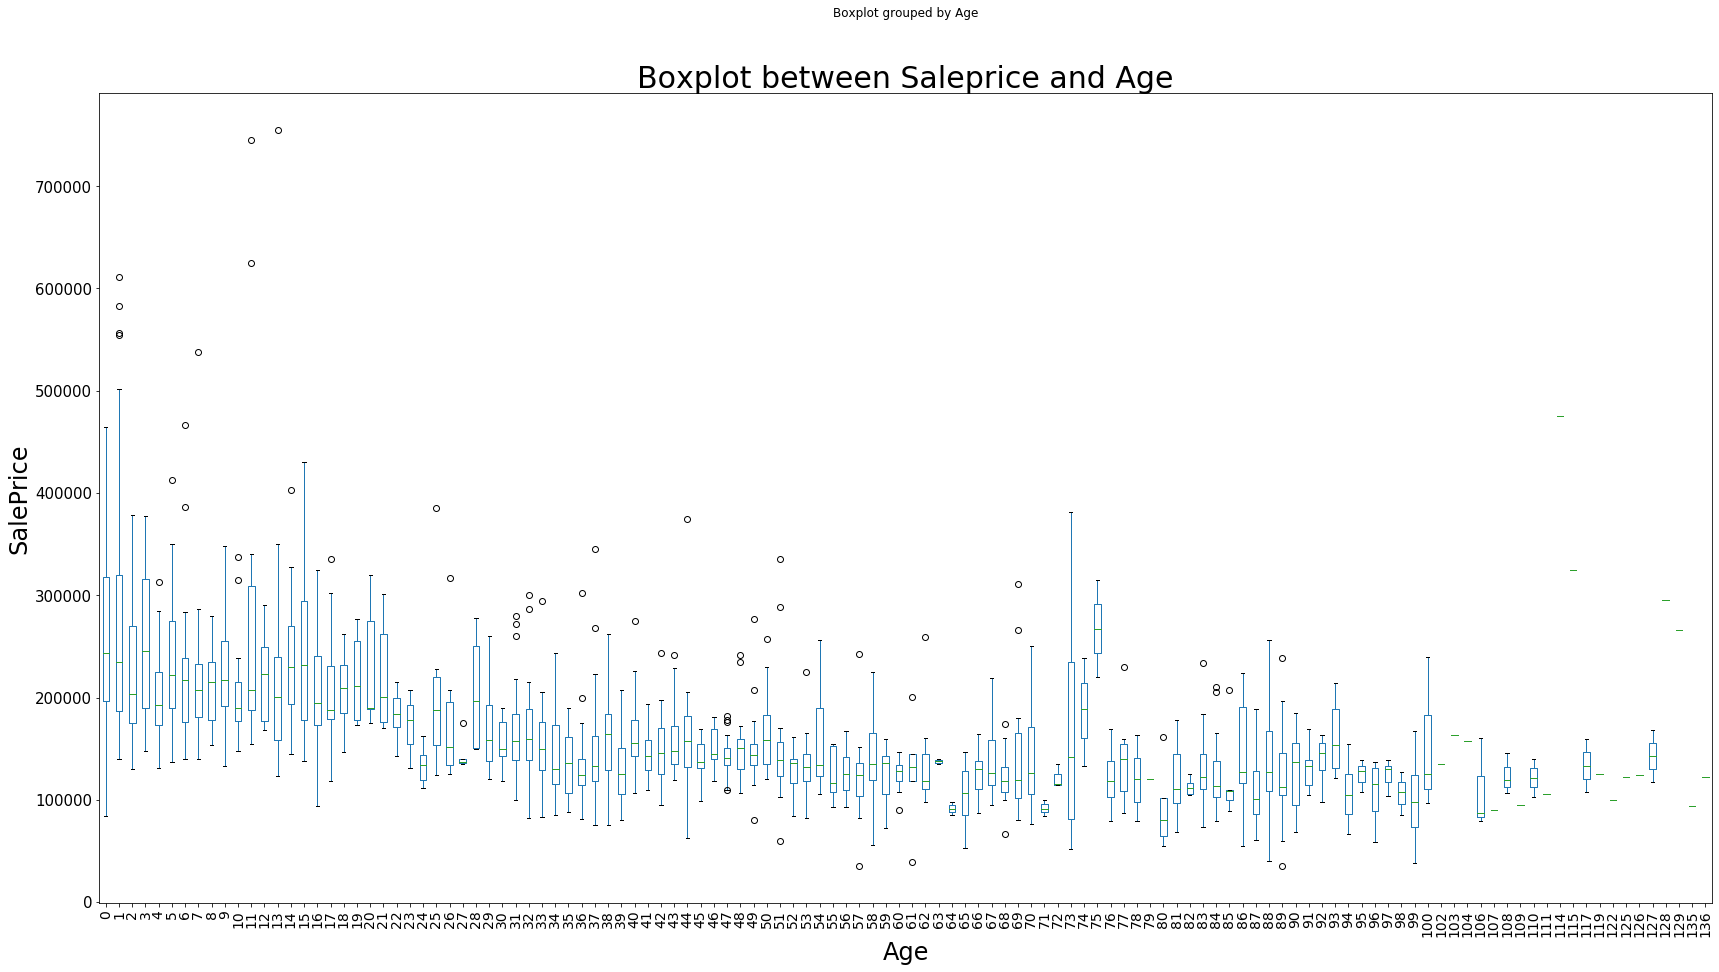

In [8]:
data['Age'] = data.YrSold - data.YearBuilt
data.boxplot(column='SalePrice',by='Age',grid=False,figsize=(28,15))
plt.title('Boxplot between Saleprice and Age',fontsize=30)
plt.xlabel('Age',fontsize=24)
plt.ylabel('SalePrice',fontsize=24)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=15)
plt.show()

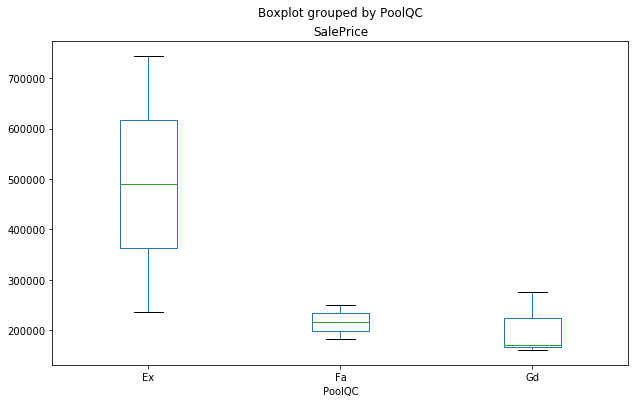

In [9]:
data.boxplot(column='SalePrice',by='PoolQC',grid=False,figsize=(10,6))
plt.show()

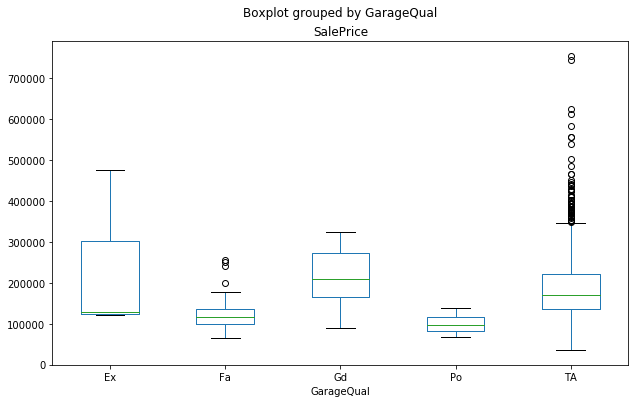

In [10]:
data.boxplot(column='SalePrice',by='GarageQual',grid=False,figsize=(10,6))
plt.show()

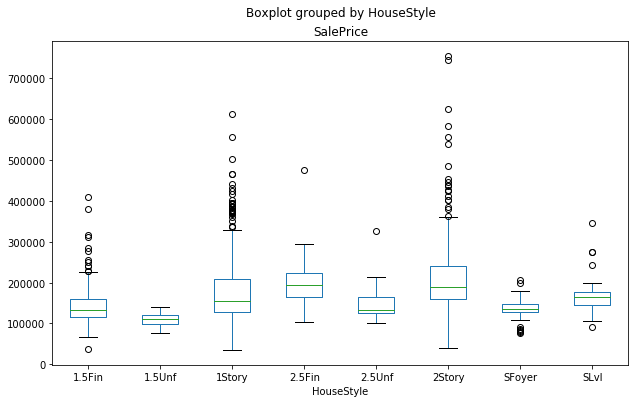

In [11]:
data.boxplot(column='SalePrice',by='HouseStyle',grid=False,figsize=(10,6))
plt.show()

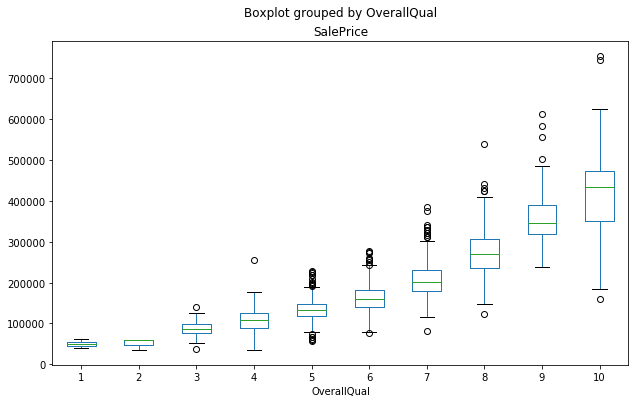

In [12]:
data.boxplot(column='SalePrice',by='OverallQual',grid=False,figsize=(10,6))
plt.show()

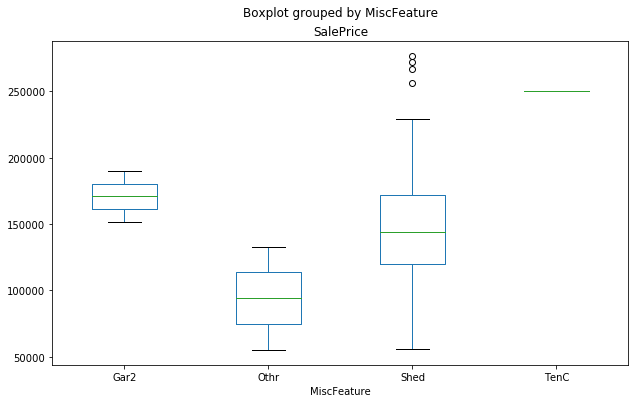

In [13]:
data.boxplot(column='SalePrice',by='MiscFeature',grid=False,figsize=(10,6))
plt.show()

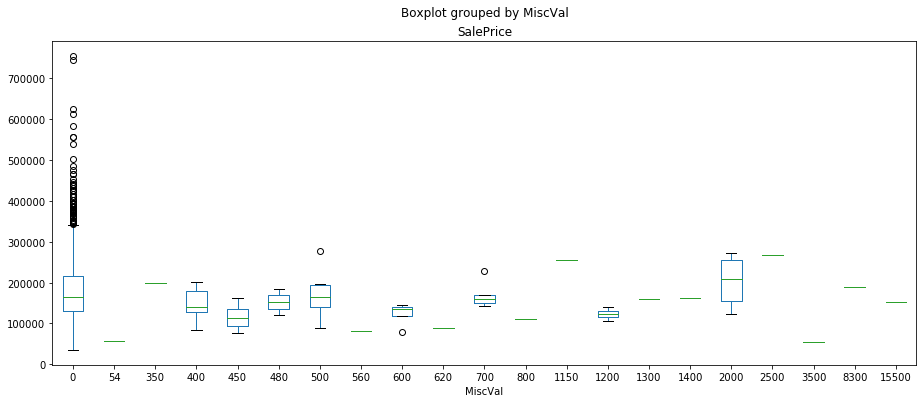

In [14]:
data.boxplot(column='SalePrice',by='MiscVal',grid=False,figsize=(15,6))
plt.show()

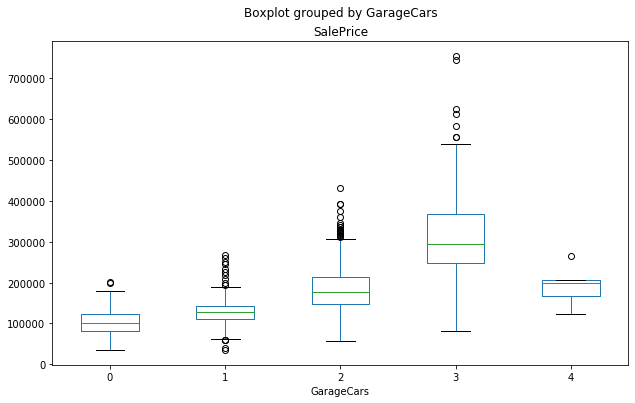

In [15]:
data.boxplot(column='SalePrice',by='GarageCars',grid=False,figsize=(10,6))
plt.show()

In [16]:
data.PoolQC.fillna("NoPool",inplace=True)
data.GarageQual.fillna("NoGarage",inplace=True)
data.MiscFeature.fillna("NoFeature",inplace=True)
# data.GarageCars.fillna("NOG",inplace=True) #This is not necessary

In [17]:
#print(data.Neighborhood.value_counts())
# neigh_colns = ['Blueste','BrDale','BrkSide','Edwards','IDOTRR','MeadowV','Mitchel','NAmes','NPkVill','OldTown','SWISU','Sawyer']
neigh_colns = ["Blueste","BrkSide","ClearCr","CollgCr","Gilbert","NAmes","NPkVill","NWAmes","OldTown","SawyerW","SWISU"]
data['NHNEW'] = ["SIM" if data.Neighborhood[i] in neigh_colns else data.Neighborhood[i] for i in range(0,len(data.Neighborhood))]

# def SIM(x):
#     if x in neigh_colns:
#         return "SIM"
#     else:
#         return x.values

# data['NHNEW'] = data.Neighborhood.apply(SIM)
#print(data.NHNEW.value_counts())

-0.523350417546816


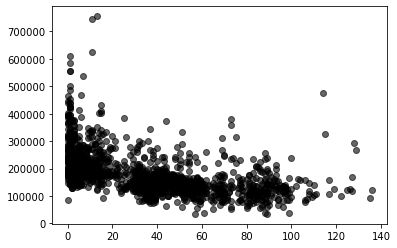

In [18]:
print(data.SalePrice.corr(data.Age))
plt.scatter(data.Age,data.SalePrice,alpha=.6,c='k')
plt.show()

0.2638433538714057


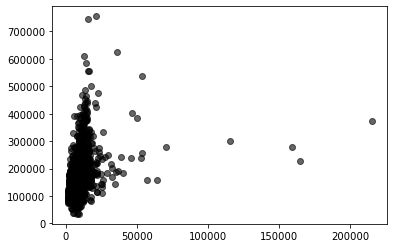

In [19]:
print(data.SalePrice.corr(data.LotArea))
plt.scatter(data.LotArea,data.SalePrice,alpha=.6,c='k')
plt.show()

0.42089691307943594


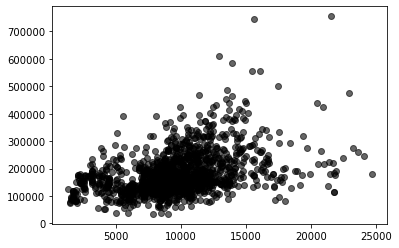

In [20]:
data = data[data.LotArea<25000]
print(data.SalePrice.corr(data.LotArea))
plt.scatter(data.LotArea,data.SalePrice,alpha=.6,c='k')
plt.show()

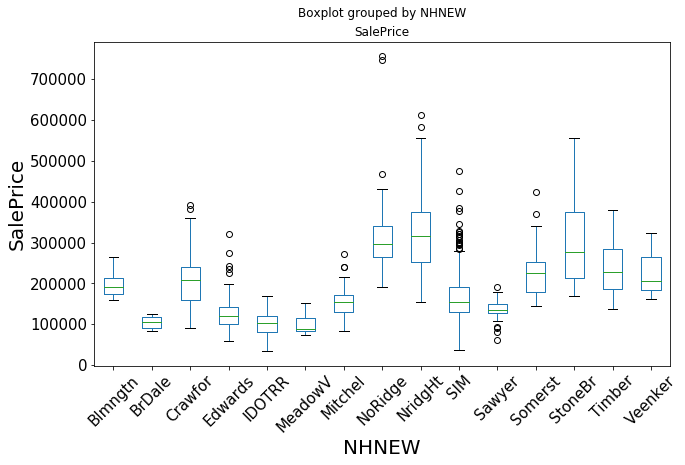

In [21]:
data.boxplot(column='SalePrice',by='NHNEW',grid=False,figsize=(10,6))
plt.xlabel('NHNEW',fontsize=20)
plt.ylabel('SalePrice',fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.show()

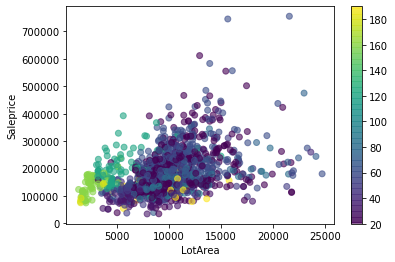

In [22]:
plt.scatter(data.LotArea,data.SalePrice,alpha=.6,c=data.MSSubClass)
plt.colorbar()
plt.xlabel('LotArea')
plt.ylabel('Saleprice')
plt.show()

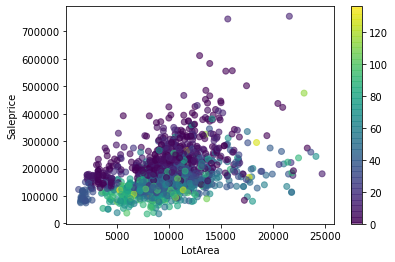

In [23]:
plt.scatter(data.LotArea,data.SalePrice,alpha=.6,c=data.Age)
plt.colorbar()
plt.xlabel('LotArea')
plt.ylabel('Saleprice')
plt.show()